Hamiltonians for optimal state

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit

In [2]:
def create_graph(nodes):

        if nodes > 10 or nodes < 7:
                raise ValueError("Number of nodes must be between 7 and 10")
        
        matrix = nx.Graph()
        matrix.add_nodes_from(range(nodes))
        

        total_possible_edges = nodes * (nodes - 1) // 2
        num_edges = total_possible_edges // 2
        edges = [(i, j) for i in range(nodes) for j in range(i + 1, nodes)]
        selected_edges = np.random.choice(range(len(edges)), num_edges, replace=False)

        for edge_idx in selected_edges:
                i, j = edges[edge_idx]
                weight = np.random.randint(1, 11)  # Random weight between 1 and 10
                matrix.add_edge(i, j, weight=weight)

        return matrix


def draw_graph(matrix, colors, pos):
    plt.figure()
    default_axes = plt.gca()
    
    nx.draw_networkx(matrix, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(matrix, "weight")
    nx.draw_networkx_edge_labels(matrix, pos=pos, edge_labels=edge_labels)
    plt.show()


def create_hamiltonian(matrix):
        num_nodes = matrix.shape[0]
        hamiltonian_matrix = np.zeros((2**num_nodes, 2**num_nodes))

        for i in range(num_nodes):
                for j in range(i + 1, num_nodes):
                        if matrix[i, j] != 0:
                                weight = matrix[i, j]
                                for state in range(2**num_nodes):
                                        binary_state = np.array([int(bit) for bit in np.binary_repr(state, width=num_nodes)])
                                        zi = 1 - 2 * binary_state[i]
                                        zj = 1 - 2 * binary_state[j]
                                        hamiltonian_matrix[state, state] += weight * (1 - zi * zj)
    
        return hamiltonian_matrix


def hamiltonian_diagonal(matrix):
    num_nodes = matrix.shape[0]
    hamiltonian_diag = np.zeros(2**num_nodes)

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if matrix[i, j] != 0:
                weight = matrix[i, j]
                for state in range(2**num_nodes):
                    binary_state = np.array([int(bit) for bit in np.binary_repr(state, width=num_nodes)])
                    zi = 1 - 2 * binary_state[i]
                    zj = 1 - 2 * binary_state[j]
                    hamiltonian_diag[state] += weight * (1 - zi * zj)
    
    return hamiltonian_diag

def exhaustive_search(hamiltonian):
        num_qubits = int(np.log2(hamiltonian.shape[0]))
        max_energy = float('-inf')
        best_state = None

        for state in range(2**num_qubits):
                energy = hamiltonian[state, state]
                if energy > max_energy:
                        max_energy = energy
                        best_state = state

        return best_state, max_energy

Randomly Generated Graphs (Weighted and Undirected)

Randomly generated graph


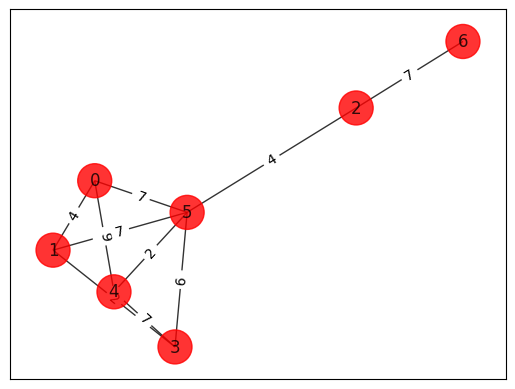

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 14.  0. ...  0.  0.  0.]
 [ 0.  0. 52. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 52.  0.  0.]
 [ 0.  0.  0. ...  0. 14.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0. 14. 52. 66. 36. 50. 80. 94. 30. 44. 58. 72. 38. 52. 58. 72. 22.  8.
 58. 44. 58. 44. 86. 72. 52. 38. 64. 50. 60. 46. 64. 50. 26. 40. 50. 64.
 62. 76. 78. 92. 48. 62. 48. 62. 56. 70. 48. 62. 48. 34. 56. 42. 84. 70.
 84. 70. 70. 56. 54. 40. 78. 64. 54. 40. 40. 54. 64. 78. 40. 54. 56. 70.
 70. 84. 70. 84. 42. 56. 34. 48. 62. 48. 70. 56. 62. 48. 62. 48. 92. 78.
 76. 62. 64. 50. 40. 26. 50. 64. 46. 60. 50. 64. 38. 52. 72. 86. 44. 58.
 44. 58.  8. 22. 72. 58. 52. 38. 72. 58. 44. 30. 94. 80. 50. 36. 66. 52.
 14.  0.]
Optimal State Energy:
94.0
Optimal State Index:
7
Exhaustive Search Result (state, energy):
(7, 94.0)


In [3]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


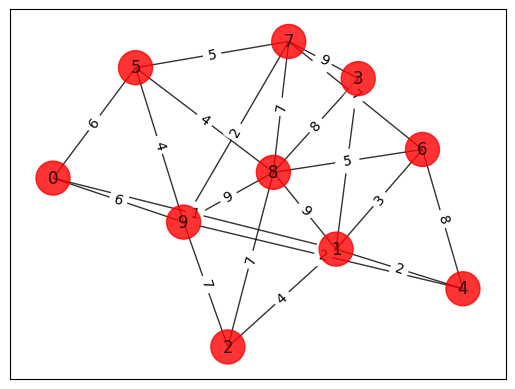

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 60.  0. ...  0.  0.  0.]
 [ 0.  0. 98. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 98.  0.  0.]
 [ 0.  0.  0. ...  0. 60.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0. 60. 98. ... 98. 60.  0.]
Optimal State Energy:
188.0
Optimal State Index:
345
Exhaustive Search Result (state, energy):
(345, 188.0)


In [4]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


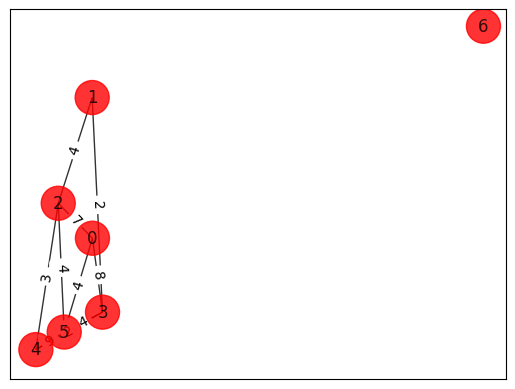

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 42. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 42.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0.  0. 42. 42. 28. 28. 34. 34. 32. 32. 58. 58. 52. 52. 42. 42. 36. 36.
 62. 62. 52. 52. 42. 42. 68. 68. 78. 78. 76. 76. 50. 50. 12. 12. 54. 54.
 40. 40. 46. 46. 36. 36. 62. 62. 56. 56. 46. 46. 32. 32. 58. 58. 48. 48.
 38. 38. 56. 56. 66. 66. 64. 64. 38. 38. 38. 38. 64. 64. 66. 66. 56. 56.
 38. 38. 48. 48. 58. 58. 32. 32. 46. 46. 56. 56. 62. 62. 36. 36. 46. 46.
 40. 40. 54. 54. 12. 12. 50. 50. 76. 76. 78. 78. 68. 68. 42. 42. 52. 52.
 62. 62. 36. 36. 42. 42. 52. 52. 58. 58. 32. 32. 34. 34. 28. 28. 42. 42.
  0.  0.]
Optimal State Energy:
78.0
Optimal State Index:
26
Exhaustive Search Result (state, energy):
(26, 78.0)


In [5]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


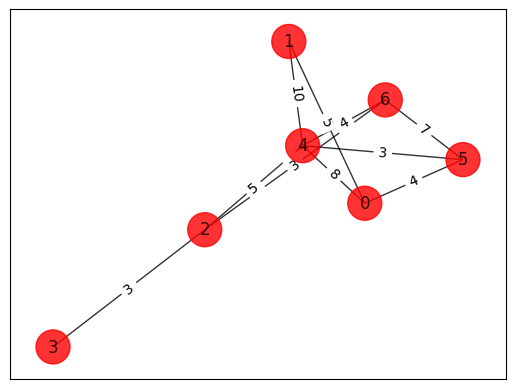

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 28.  0. ...  0.  0.  0.]
 [ 0.  0. 28. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 28.  0.  0.]
 [ 0.  0.  0. ...  0. 28.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0. 28. 28. 28. 60. 72. 76. 60.  6. 34. 34. 34. 66. 78. 82. 66. 22. 38.
 50. 38. 62. 62. 78. 50. 16. 32. 44. 32. 56. 56. 72. 44. 30. 58. 58. 58.
 50. 62. 66. 50. 36. 64. 64. 64. 56. 68. 72. 56. 52. 68. 80. 68. 52. 52.
 68. 40. 46. 62. 74. 62. 46. 46. 62. 34. 34. 62. 46. 46. 62. 74. 62. 46.
 40. 68. 52. 52. 68. 80. 68. 52. 56. 72. 68. 56. 64. 64. 64. 36. 50. 66.
 62. 50. 58. 58. 58. 30. 44. 72. 56. 56. 32. 44. 32. 16. 50. 78. 62. 62.
 38. 50. 38. 22. 66. 82. 78. 66. 34. 34. 34.  6. 60. 76. 72. 60. 28. 28.
 28.  0.]
Optimal State Energy:
82.0
Optimal State Index:
14
Exhaustive Search Result (state, energy):
(14, 82.0)


In [6]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


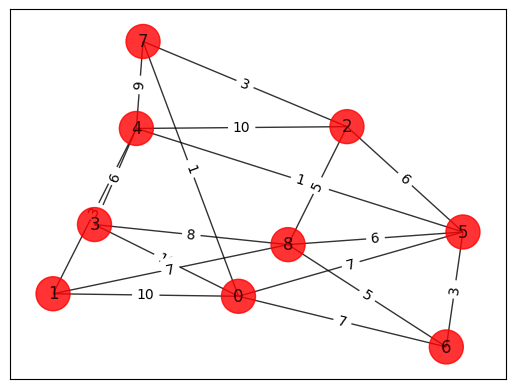

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 62.  0. ...  0.  0.  0.]
 [ 0.  0. 26. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 26.  0.  0.]
 [ 0.  0.  0. ...  0. 62.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[  0.  62.  26.  88.  30.  72.  56.  98.  46.  84.  72. 110.  64.  82.
  90. 108.  58. 120.  48. 110.  88. 130.  78. 120. 100. 138.  90. 128.
 118. 136. 108. 126.  48.  78.  74. 104.  78.  88. 104. 114.  94. 100.
 120. 126. 112.  98. 138. 124.  82. 112.  72. 102. 112. 122. 102. 112.
 124. 130. 114. 120. 142. 128. 132. 118.  48.  90.  62. 104.  78. 100.
  92. 114.  70.  88.  84. 102.  88.  86. 102. 100.  66. 108.  44.  86.
  96. 118.  74.  96.  84. 102.  62.  80. 102. 100.  80.  78.  96. 106.
 110. 120. 126. 116. 140. 130. 118. 104. 132. 118. 136. 102. 150. 116.
  90. 100.  68.  78. 120. 110.  98.  88. 108.  94.  86.  72. 126.  92.
 104.  70.  40.  74.  66. 100.  70.  84.  96. 110.  86.  96. 112. 122.
 104.  94. 130. 120.  86. 120.  76. 110. 116. 130. 106. 120. 128. 138.
 118.

In [7]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


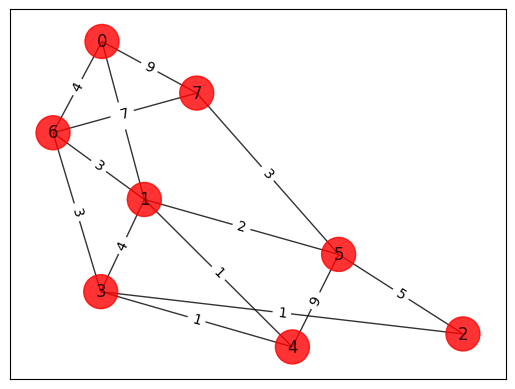

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 38.  0. ...  0.  0.  0.]
 [ 0.  0. 34. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 34.  0.  0.]
 [ 0.  0.  0. ...  0. 38.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0. 38. 34. 44. 38. 64. 72. 70. 22. 60. 56. 66. 24. 50. 58. 56. 18. 56.
 40. 50. 56. 82. 78. 76. 36. 74. 58. 68. 38. 64. 60. 58. 12. 50. 46. 56.
 30. 56. 64. 62. 34. 72. 68. 78. 16. 42. 50. 48. 26. 64. 48. 58. 44. 70.
 66. 64. 44. 82. 66. 76. 26. 52. 48. 46. 26. 64. 48. 58. 56. 82. 78. 76.
 44. 82. 66. 76. 38. 64. 60. 58. 28. 66. 38. 48. 58. 84. 68. 66. 42. 80.
 52. 62. 36. 62. 46. 44. 38. 76. 60. 70. 48. 74. 70. 68. 56. 94. 78. 88.
 30. 56. 52. 50. 36. 74. 46. 56. 46. 72. 56. 54. 50. 88. 60. 70. 24. 50.
 34. 32. 32. 34. 50. 24. 70. 60. 88. 50. 54. 56. 72. 46. 56. 46. 74. 36.
 50. 52. 56. 30. 88. 78. 94. 56. 68. 70. 74. 48. 70. 60. 76. 38. 44. 46.
 62. 36. 62. 52. 80. 42. 66. 68. 84. 58. 48. 38. 66. 28. 58. 60. 64. 38.
 76. 66. 82. 44. 76. 78. 82. 56. 58. 48. 64. 26. 46. 48.

In [8]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


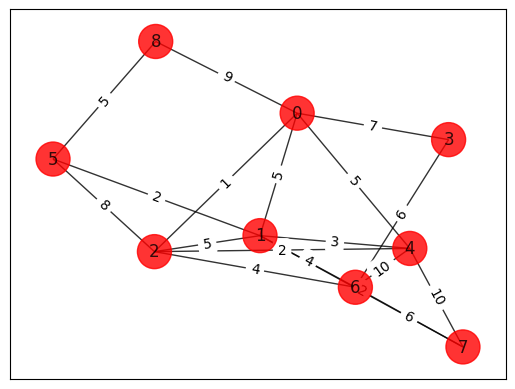

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 28.  0. ...  0.  0.  0.]
 [ 0.  0. 36. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 36.  0.  0.]
 [ 0.  0.  0. ...  0. 28.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[  0.  28.  36.  64.  60.  88.  72. 100.  30.  38.  66.  74.  90.  98.
 102. 110.  60.  88.  56.  84.  80. 108.  52.  80.  90.  98.  86.  94.
 110. 118.  82.  90.  26.  54.  62.  90.  62.  90.  74. 102.  56.  64.
  92. 100.  92. 100. 104. 112.  86. 114.  82. 110.  82. 110.  54.  82.
 116. 124. 112. 120. 112. 120.  84.  92.  40.  68.  76. 104.  84. 112.
  96. 124.  38.  46.  74.  82.  82.  90.  94. 102.  92. 120.  88. 116.
  96. 124.  68.  96.  90.  98.  86.  94.  94. 102.  66.  74.  66.  94.
 102. 130.  86. 114.  98. 126.  64.  72. 100. 108.  84.  92.  96. 104.
 118. 146. 114. 142.  98. 126.  70.  98. 116. 124. 112. 120.  96. 104.
  68.  76.  42.  70.  70.  98.  86. 114.  90. 118.  64.  72.  92. 100.
 108. 116. 112. 120.  90. 118.  78. 106.  94. 122.  58.  86. 112. 120.
 100.

In [9]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


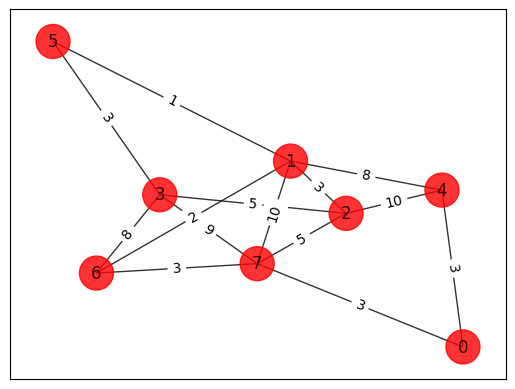

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 60.  0. ...  0.  0.  0.]
 [ 0.  0. 26. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 26.  0.  0.]
 [ 0.  0.  0. ...  0. 60.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[  0.  60.  26.  74.   8.  68.  34.  82.  42. 102.  68. 116.  50. 110.
  76. 124.  50.  74.  44.  56.  46.  70.  40.  52.  92. 116.  86.  98.
  88. 112.  82.  94.  46.  86.  72. 100.  54.  94.  80. 108.  48.  88.
  74. 102.  56.  96.  82. 110.  76.  80.  70.  62.  72.  76.  66.  58.
  78.  82.  72.  64.  74.  78.  68.  60.  48.  68.  66.  74.  52.  72.
  70.  78.  58.  78.  76.  84.  62.  82.  80.  88.  98.  82.  84.  56.
  90.  74.  76.  48. 108.  92.  94.  66. 100.  84.  86.  58.  82.  82.
 100.  88.  86.  86. 104.  92.  52.  52.  70.  58.  56.  56.  74.  62.
 112.  76.  98.  50. 104.  68.  90.  42.  82.  46.  68.  20.  74.  38.
  60.  12.  12.  60.  38.  74.  20.  68.  46.  82.  42.  90.  68. 104.
  50.  98.  76. 112.  62.  74.  56.  56.  58.  70.  52.  52.  92. 104.
  86.

In [10]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


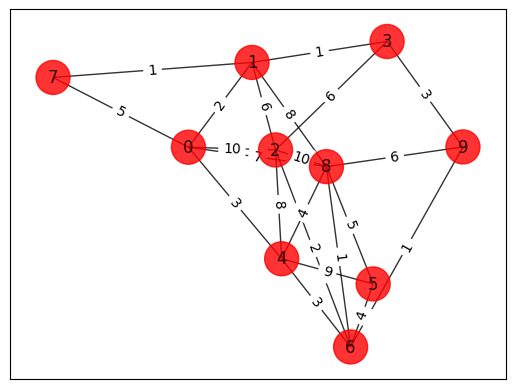

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 20.  0. ...  0.  0.  0.]
 [ 0.  0. 82. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 82.  0.  0.]
 [ 0.  0.  0. ...  0. 20.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0. 20. 82. ... 82. 20.  0.]
Optimal State Energy:
160.0
Optimal State Index:
405
Exhaustive Search Result (state, energy):
(405, 160.0)


In [11]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


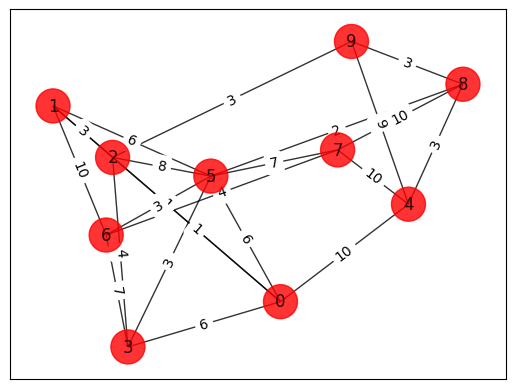

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 30.  0. ...  0.  0.  0.]
 [ 0.  0. 36. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 36.  0.  0.]
 [ 0.  0.  0. ...  0. 30.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0. 30. 36. ... 36. 30.  0.]
Optimal State Energy:
194.0
Optimal State Index:
370
Exhaustive Search Result (state, energy):
(370, 194.0)


In [12]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


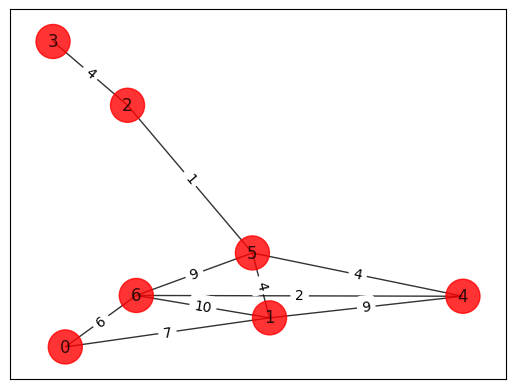

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 54.  0. ...  0.  0.  0.]
 [ 0.  0. 36. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 36.  0.  0.]
 [ 0.  0.  0. ...  0. 54.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0. 54. 36. 54. 30. 76. 50. 60.  8. 62. 44. 62. 38. 84. 58. 68. 10. 64.
 42. 60. 40. 86. 56. 66.  2. 56. 34. 52. 32. 78. 48. 58. 60. 74. 80. 58.
 54. 60. 58. 28. 68. 82. 88. 66. 62. 68. 66. 36. 70. 84. 86. 64. 64. 70.
 64. 34. 62. 76. 78. 56. 56. 62. 56. 26. 26. 56. 62. 56. 56. 78. 76. 62.
 34. 64. 70. 64. 64. 86. 84. 70. 36. 66. 68. 62. 66. 88. 82. 68. 28. 58.
 60. 54. 58. 80. 74. 60. 58. 48. 78. 32. 52. 34. 56.  2. 66. 56. 86. 40.
 60. 42. 64. 10. 68. 58. 84. 38. 62. 44. 62.  8. 60. 50. 76. 30. 54. 36.
 54.  0.]
Optimal State Energy:
88.0
Optimal State Index:
42
Exhaustive Search Result (state, energy):
(42, 88.0)


In [13]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


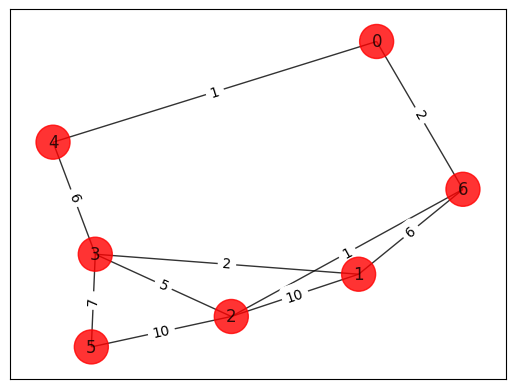

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 18.  0. ...  0.  0.  0.]
 [ 0.  0. 34. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 34.  0.  0.]
 [ 0.  0.  0. ...  0. 18.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0. 18. 34. 52. 14. 32. 48. 66. 40. 58. 46. 64. 30. 48. 36. 54. 52. 66.
 46. 60. 66. 80. 60. 74. 72. 86. 38. 52. 62. 76. 28. 42. 36. 30. 70. 64.
 50. 44. 84. 78. 68. 62. 74. 68. 58. 52. 64. 58. 48. 38. 42. 32. 62. 52.
 56. 46. 60. 50. 26. 16. 50. 40. 16.  6.  6. 16. 40. 50. 16. 26. 50. 60.
 46. 56. 52. 62. 32. 42. 38. 48. 58. 64. 52. 58. 68. 74. 62. 68. 78. 84.
 44. 50. 64. 70. 30. 36. 42. 28. 76. 62. 52. 38. 86. 72. 74. 60. 80. 66.
 60. 46. 66. 52. 54. 36. 48. 30. 64. 46. 58. 40. 66. 48. 32. 14. 52. 34.
 18.  0.]
Optimal State Energy:
86.0
Optimal State Index:
25
Exhaustive Search Result (state, energy):
(25, 86.0)


In [14]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


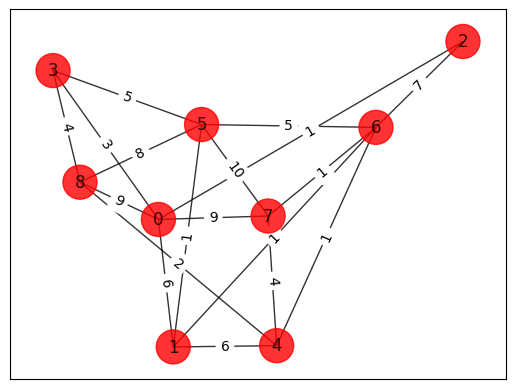

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 46.  0. ...  0.  0.  0.]
 [ 0.  0. 48. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 48.  0.  0.]
 [ 0.  0.  0. ...  0. 46.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[  0.  46.  48.  94.  30.  76.  74. 120.  58.  72.  66.  80.  68.  82.
  72.  86.  26.  64.  58.  96.  52.  90.  80. 118.  84.  90.  76.  82.
  90.  96.  78.  84.  24.  54.  72. 102.  54.  84.  98. 128.  62.  60.
  70.  68.  72.  70.  76.  74.  50.  72.  82. 104.  76.  98. 104. 126.
  88.  78.  80.  70.  94.  84.  82.  72.  16.  62.  64. 110.  18.  64.
  62. 108.  74.  88.  82.  96.  56.  70.  60.  74.  42.  80.  74. 112.
  40.  78.  68. 106. 100. 106.  92.  98.  78.  84.  66.  72.  40.  70.
  88. 118.  42.  72.  86. 116.  78.  76.  86.  84.  60.  58.  64.  62.
  66.  88.  98. 120.  64.  86.  92. 114. 104.  94.  96.  86.  82.  72.
  70.  60.  28.  74.  76. 122.  54. 100.  98. 144.  82.  96.  90. 104.
  88. 102.  92. 106.  30.  68.  62. 100.  52.  90.  80. 118.  84.  90.
  76.

In [15]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


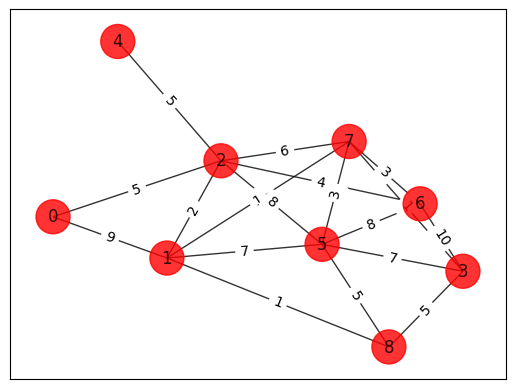

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 22.  0. ...  0.  0.  0.]
 [ 0.  0. 28. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 28.  0.  0.]
 [ 0.  0.  0. ...  0. 22.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[  0.  22.  28.  50.  50.  72.  66.  88.  76.  78.  92.  94.  94.  96.
  98. 100.  10.  32.  38.  60.  60.  82.  76.  98.  86.  88. 102. 104.
 104. 106. 108. 110.  46.  48.  70.  72.  56.  58.  68.  70.  94.  76.
 106.  88.  72.  54.  72.  54.  56.  58.  80.  82.  66.  68.  78.  80.
 104.  86. 116.  98.  82.  64.  82.  64.  60.  82.  64.  86.  94. 116.
  86. 108. 104. 106.  96.  98. 106. 108.  86.  88.  50.  72.  54.  76.
  84. 106.  76.  98.  94.  96.  86.  88.  96.  98.  76.  78. 106. 108.
 106. 108. 100. 102.  88.  90. 122. 104. 110.  92.  84.  66.  60.  42.
  96.  98.  96.  98.  90.  92.  78.  80. 112.  94. 100.  82.  74.  56.
  50.  32.  40.  58.  64.  82.  90. 108. 102. 120.  88.  86. 100.  98.
 106. 104. 106. 104.  50.  68.  74.  92. 100. 118. 112. 130.  98.  96.
 110.

In [16]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


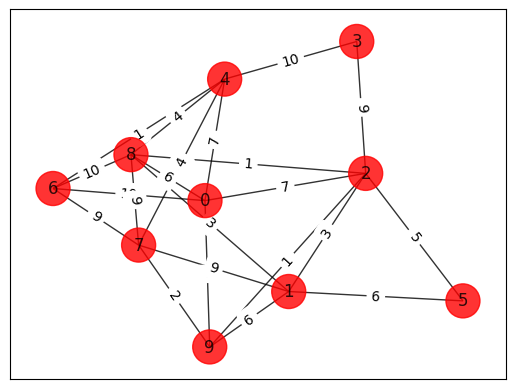

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 34.  0. ...  0.  0.  0.]
 [ 0.  0. 66. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 66.  0.  0.]
 [ 0.  0.  0. ...  0. 34.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0. 34. 66. ... 66. 34.  0.]
Optimal State Energy:
208.0
Optimal State Index:
425
Exhaustive Search Result (state, energy):
(425, 208.0)


In [17]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


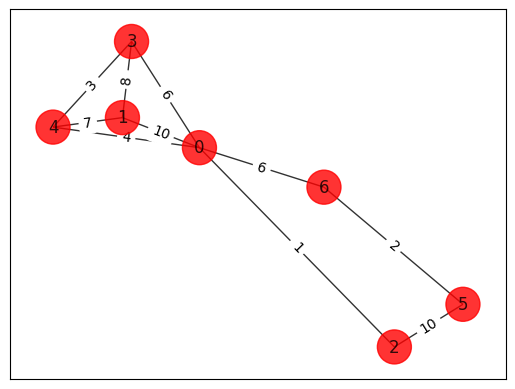

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 16.  0. ...  0.  0.  0.]
 [ 0.  0. 24. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 24.  0.  0.]
 [ 0.  0.  0. ...  0. 16.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0. 16. 24. 32. 28. 44. 52. 60. 34. 50. 58. 66. 50. 66. 74. 82. 22. 38.
  6. 14. 50. 66. 34. 42. 56. 72. 40. 48. 72. 88. 56. 64. 50. 66. 74. 82.
 50. 66. 74. 82. 52. 68. 76. 84. 40. 56. 64. 72. 72. 88. 56. 64. 72. 88.
 56. 64. 74. 90. 58. 66. 62. 78. 46. 54. 54. 46. 78. 62. 66. 58. 90. 74.
 64. 56. 88. 72. 64. 56. 88. 72. 72. 64. 56. 40. 84. 76. 68. 52. 82. 74.
 66. 50. 82. 74. 66. 50. 64. 56. 88. 72. 48. 40. 72. 56. 42. 34. 66. 50.
 14.  6. 38. 22. 82. 74. 66. 50. 66. 58. 50. 34. 60. 52. 44. 28. 32. 24.
 16.  0.]
Optimal State Energy:
90.0
Optimal State Index:
57
Exhaustive Search Result (state, energy):
(57, 90.0)


In [18]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


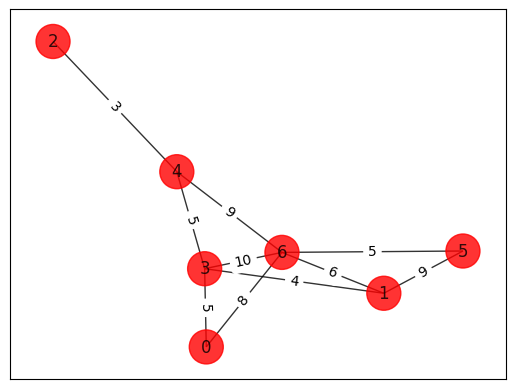

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 76.  0. ...  0.  0.  0.]
 [ 0.  0. 28. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 28.  0.  0.]
 [ 0.  0.  0. ...  0. 76.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0. 76. 28. 84. 34. 74. 62. 82. 48. 84. 76. 92. 62. 62. 90. 70.  6. 82.
 34. 90. 28. 68. 56. 76. 54. 90. 82. 98. 56. 56. 84. 64. 38. 90. 30. 62.
 72. 88. 64. 60. 70. 82. 62. 54. 84. 60. 76. 32. 44. 96. 36. 68. 66. 82.
 58. 54. 76. 88. 68. 60. 78. 54. 70. 26. 26. 70. 54. 78. 60. 68. 88. 76.
 54. 58. 82. 66. 68. 36. 96. 44. 32. 76. 60. 84. 54. 62. 82. 70. 60. 64.
 88. 72. 62. 30. 90. 38. 64. 84. 56. 56. 98. 82. 90. 54. 76. 56. 68. 28.
 90. 34. 82.  6. 70. 90. 62. 62. 92. 76. 84. 48. 82. 62. 74. 34. 84. 28.
 76.  0.]
Optimal State Energy:
98.0
Optimal State Index:
27
Exhaustive Search Result (state, energy):
(27, 98.0)


In [19]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


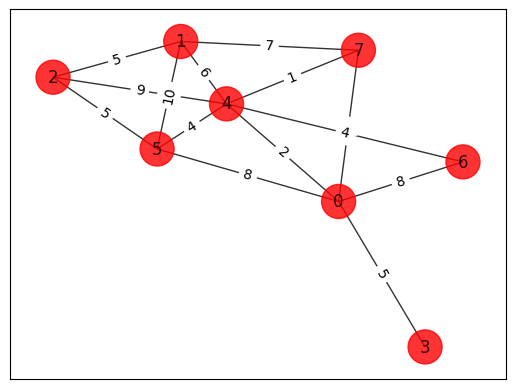

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 26.  0. ...  0.  0.  0.]
 [ 0.  0. 24. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 24.  0.  0.]
 [ 0.  0.  0. ...  0. 26.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[  0.  26.  24.  50.  54.  80.  78. 104.  52.  74.  60.  82.  90. 112.
  98. 120.  10.  36.  34.  60.  64.  90.  88. 114.  62.  84.  70.  92.
 100. 122. 108. 130.  38.  64.  62.  88.  72.  98.  96. 122.  54.  76.
  62.  84.  72.  94.  80. 102.  48.  74.  72.  98.  82. 108. 106. 132.
  64.  86.  72.  94.  82. 104.  90. 112.  56.  54.  80.  78.  70.  68.
  94.  92.  84.  78.  92.  86.  82.  76.  90.  84.  66.  64.  90.  88.
  80.  78. 104. 102.  94.  88. 102.  96.  92.  86. 100.  94.  74.  72.
  98.  96.  68.  66.  92.  90.  66.  60.  74.  68.  44.  38.  52.  46.
  84.  82. 108. 106.  78.  76. 102. 100.  76.  70.  84.  78.  54.  48.
  62.  56.  56.  62.  48.  54.  78.  84.  70.  76. 100. 102.  76.  78.
 106. 108.  82.  84.  46.  52.  38.  44.  68.  74.  60.  66.  90.  92.
  66.

In [20]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


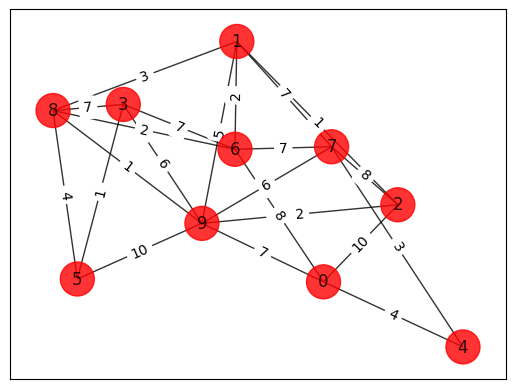

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 74.  0. ...  0.  0.  0.]
 [ 0.  0. 34. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 34.  0.  0.]
 [ 0.  0.  0. ...  0. 74.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[ 0. 74. 34. ... 34. 74.  0.]
Optimal State Energy:
196.0
Optimal State Index:
171
Exhaustive Search Result (state, energy):
(171, 196.0)


In [21]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)

Randomly generated graph


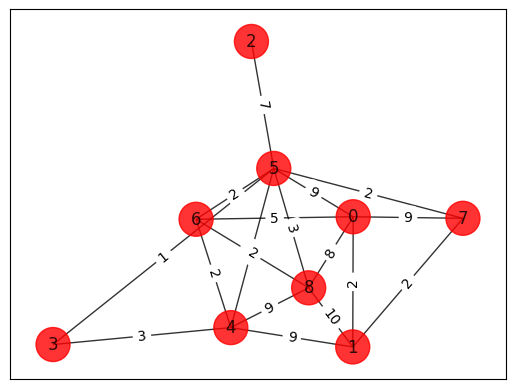

Hamiltonian diagonals
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 64.  0. ...  0.  0.  0.]
 [ 0.  0. 26. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 26.  0.  0.]
 [ 0.  0.  0. ...  0. 64.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[  0.  64.  26.  90.  22.  78.  48. 104.  54. 106.  72. 124.  68. 112.
  86. 130.  52.  80.  78. 106.  66.  86.  92. 112.  94. 110. 112. 128.
 100. 108. 118. 126.   8.  72.  34.  98.  30.  86.  56. 112.  58. 110.
  76. 128.  72. 116.  90. 134.  48.  76.  74. 102.  62.  82.  88. 108.
  86. 102. 104. 120.  92. 100. 110. 118.  14.  78.  40. 104.  36.  92.
  62. 118.  40.  92.  58. 110.  54.  98.  72. 116.  66.  94.  92. 120.
  80. 100. 106. 126.  80.  96.  98. 114.  86.  94. 104. 112.  22.  86.
  48. 112.  44. 100.  70. 126.  44.  96.  62. 114.  58. 102.  76. 120.
  62.  90.  88. 116.  76.  96. 102. 122.  72.  88.  90. 106.  78.  86.
  96. 104.  46.  70.  64.  88.  68.  84.  86. 102. 100. 112. 110. 122.
 114. 118. 124. 128.  62.  50.  80.  68.  76.  56.  94.  74. 104.  80.
 114.

In [22]:
# Create graph
nodes = np.random.randint(7,11)
matrix = create_graph(nodes)
colors = ["r" for node in matrix.nodes()]
pos = nx.spring_layout(matrix)
print("Randomly generated graph")
draw_graph(matrix, colors, pos)

# Construct Hamiltonian
graph = nx.to_numpy_array(matrix)
hamiltonian = create_hamiltonian(graph)
diagonal = hamiltonian_diagonal(graph)
print("Hamiltonian diagonals")
print(hamiltonian)
print(diagonal)

# Find optimal solution based on diagonal elements
max_energy_index = np.argmax(diagonal)
optimal_state_energy = diagonal[max_energy_index]
print("Optimal State Energy:")
print(optimal_state_energy)
print("Optimal State Index:")
print(max_energy_index)

# Exhausive Search
search = exhaustive_search(hamiltonian)
print("Exhaustive Search Result (state, energy):")
print(search)